# 準備

In [ ]:
# Google Driveのマウント
from google.colab import drive
drive.mount('/content/drive/')

# 目的の場所（フォルダ・ディレクトリ）へ移動（各自の環境で適宜修正）
%cd "/content/drive/MyDrive/Colab Notebooks/JKJ1A/"
%ls

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/JKJ1A
csv/  data/  graph/  LICENSE  model/  notebook/  README.md  src/


# 課題

JKJ1A データセットにおいて，画像データからラベル (7 次元ベクトル) を予想し，実際のラベル (7 次元ベ クトル) との距離 (2 次元ノルム) を求める.その距離が閾値以下となる確率をモデルの精度と定め，その精度 上げるためにモデルの学習を試みる.今回の実験において用いられる用語は以下の通りである.





*    JKJ1A データセット

   (画像，ラベル) 対のデータセットである.各画像のフォーマットは RGB 画像であり, 幅 256× 高 さ 256 ピクセルとなっている.この画像に対して beauty という基準に基づく 7 段階の投票を行 い，その結果をラベルとした.ラベルは 7 次元ベクトルであり，投票結果を反映したヒストグラム でもある.







*   VGG11 モデル

    畳み込み 8 層と全結合層 3 層からなるニューラルネットワーク.




# 目的

画像データの少ないデータセットにおいて，元の画像を変換した画像をデータに付け加えてデータ数を増加
させる.その結果モデルの予想精度は上昇することを示す.

# コード

In [ ]:
#7次元のヒストグラムの最大だけに注目し，「テスト画像の最大投票を予測する」問題に取り組む

# モジュールのインポート
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader, Subset



import numpy as np
import matplotlib.pyplot as plt

# warningを表示しない
import warnings
warnings.filterwarnings("ignore")

# srcの中のファイルがimportできるようになる
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/JKJ1A/src/ex3')

from jkj1a import load_data, load_data_2
from image_show import imshow



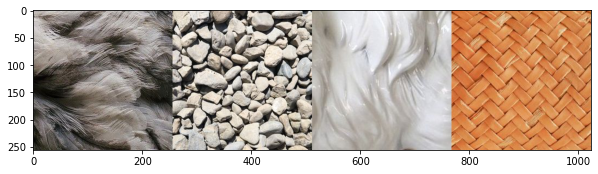

基準のラベルからの距離は[0.16666666666666666, 0.1767766952966369, 0.1863389981249825]です．


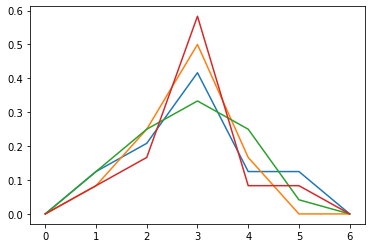

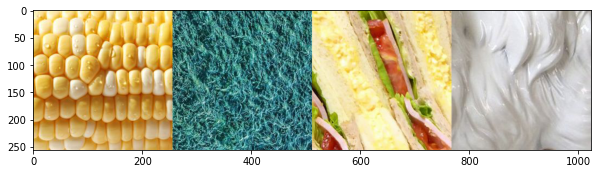

基準のラベルからの距離は[0.19543398999264291, 0.08333333333333334, 0.14433756729740646]です．


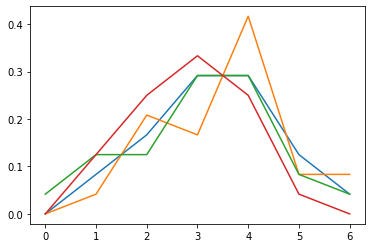

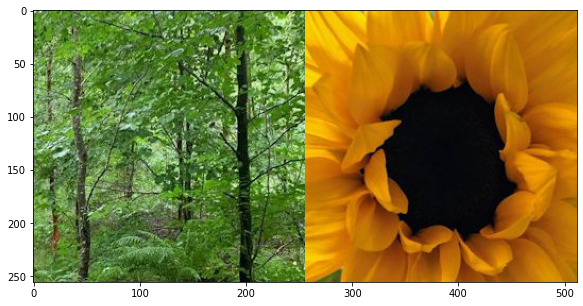

基準のラベルからの距離は[0.13176156917368248]です．


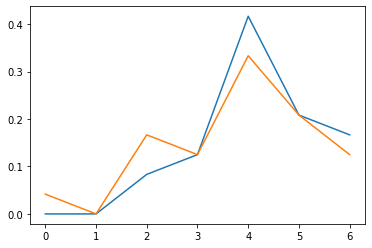

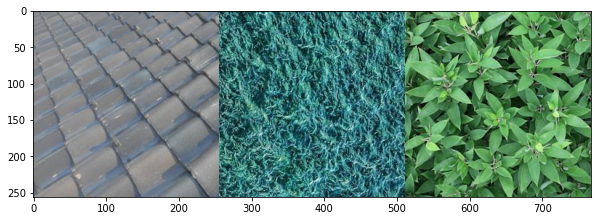

基準のラベルからの距離は[0.1178511301977579, 0.18633899812498245]です．


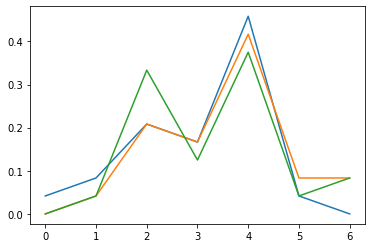

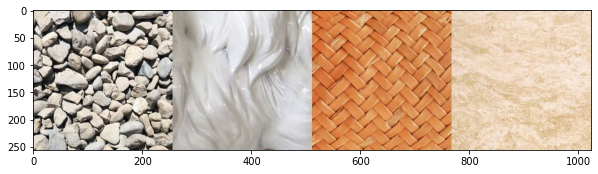

基準のラベルからの距離は[0.19543398999264291, 0.16666666666666669, 0.14433756729740646]です．


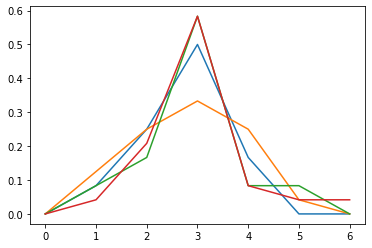

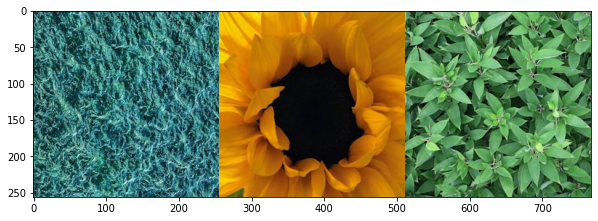

基準のラベルからの距離は[0.1767766952966369, 0.14433756729740643]です．


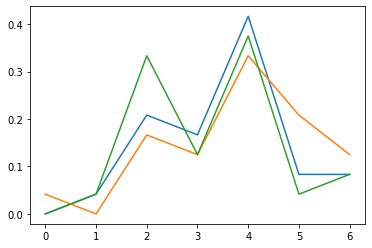

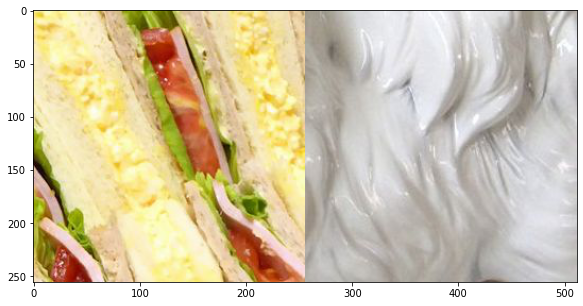

基準のラベルからの距離は[0.15590239111558088]です．


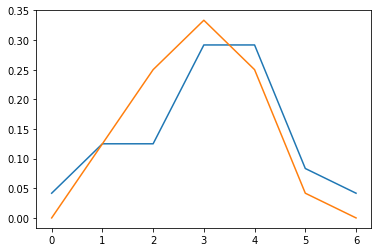

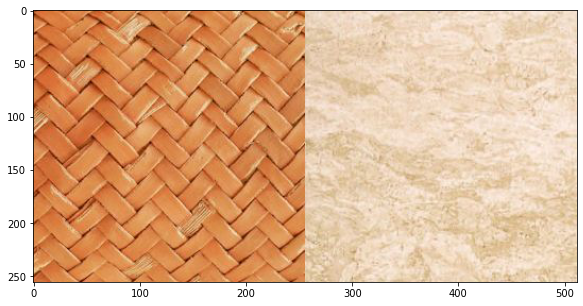

基準のラベルからの距離は[0.08333333333333334]です．


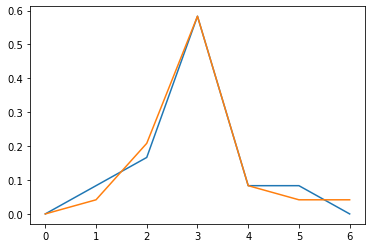

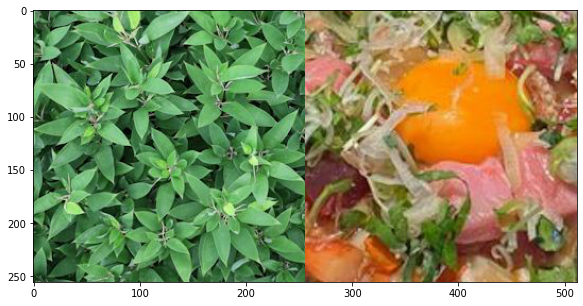

基準のラベルからの距離は[0.15590239111558088]です．


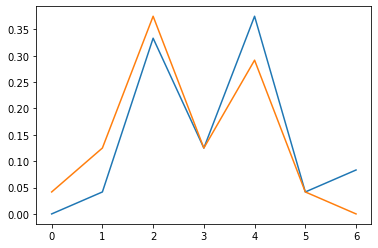

In [ ]:
#投票の様子が「よく似ている」画像の探索 　閾値は0.2


trainloader, testloader, classes = load_data(batch_size=20, metric='beauty', img_size = 256)#データをロードする

# データセット全体から，先頭のサブセットを取り出す．サブセットから画像とラベルを取り出す.


dataiter = iter(trainloader)  #trainloaderをdataiterというイテレータに変換．

images, labels = next(dataiter)  #trainloaderの最初の要素を取り出す．


#ラベルyを基準として，他のラベルとの2乗距離を求める．その距離が閾値以下である時，画像データを表示してラベルをプロットする．


for i, (x, y) in enumerate(zip(images, labels)):  #複数のイテラブルオブジェクト（images, labels）の要素とインデックス（カウンタ）を同時に取得．

  similar_images = [x]  #テンソルxを要素に持つ配列
  similar_labels = [y]   #テンソルyを要素に持つ配列
  distList = []          #2乗距離を要素として持つ配列．


  for x2, y2 in zip(images[i+1::], labels[i+1::]):

    dist = float(torch.dist(y, y2, p=2))

    if abs(dist) <= 0.2:  #距離の閾値を設定
      similar_images.append(x2)
      similar_labels.append(y2)
      distList.append(dist)


  if similar_images != [x] and similar_labels != [y]:

    imshow(torchvision.utils.make_grid(torch.cat(similar_images, dim = 2)))  # 画像の表示

    print(f'基準のラベルからの距離は{distList}です．')  #2乗距離を要素として持つ配列を表示．


    for similar_label in similar_labels:
      plt.plot(similar_label)   #ラベルをプロットする．


In [ ]:
#JKJ1Aのデータセットを学習し，画像からラベルを予想
#実際のラベルと予想ラベルの距離が，閾値(value = 0.2)以下となる確率をモデルの予想精度とする．
!python src/ex3/predictLabel_normal.py --nepochs 200 --batch_size 128 --lr 0.001 --value 0.2

using device: cuda:0
[epoch  1] loss: 41.125
[epoch  2] loss: 59.840
[epoch  3] loss: 38.466
[epoch  4] loss: 50.695
[epoch  5] loss: 76.313
[epoch  6] loss: 92.232
[epoch  7] loss: 51.287
[epoch  8] loss: 21.902
[epoch  9] loss: 15.032
[epoch 10] loss: 9.790
[epoch 11] loss: 6.030
[epoch 12] loss: 6.967
[epoch 13] loss: 5.491
[epoch 14] loss: 4.755
[epoch 15] loss: 4.063
[epoch 16] loss: 3.791
[epoch 17] loss: 3.763
[epoch 18] loss: 3.539
[epoch 19] loss: 3.698
[epoch 20] loss: 3.581
[epoch 21] loss: 3.669
[epoch 22] loss: 3.616
[epoch 23] loss: 3.744
[epoch 24] loss: 3.733
[epoch 25] loss: 3.899
[epoch 26] loss: 3.925
[epoch 27] loss: 4.052
[epoch 28] loss: 3.921
[epoch 29] loss: 3.867
[epoch 30] loss: 3.691
[epoch 31] loss: 3.629
[epoch 32] loss: 3.544
[epoch 33] loss: 3.526
[epoch 34] loss: 3.500
[epoch 35] loss: 3.509
[epoch 36] loss: 3.504
[epoch 37] loss: 3.510
[epoch 38] loss: 3.502
[epoch 39] loss: 3.499
[epoch 40] loss: 3.481
[epoch 41] loss: 3.468
[epoch 42] loss: 3.443
[epo

In [ ]:
#元の画像データを左右反転させ,グレイスケール変換した画像を用意．その画像で訓練したモデルをmodel_jkj1a_flippedImage.pthとして保存
!python src/ex3/flippedImage.py --nepochs 200 --batch_size 128 --lr 0.001 --value 0.2 --save_model_name 'model/model_jkj1a_flippedImage.pth'

using device: cuda:0
[epoch  1] loss: 37.046
[epoch  2] loss: 66.590
[epoch  3] loss: 39.210
[epoch  4] loss: 52.530
[epoch  5] loss: 24.116
[epoch  6] loss: 38.948
[epoch  7] loss: 44.387
[epoch  8] loss: 46.530
[epoch  9] loss: 41.380
[epoch 10] loss: 17.481
[epoch 11] loss: 17.765
[epoch 12] loss: 10.577
[epoch 13] loss: 9.350
[epoch 14] loss: 7.524
[epoch 15] loss: 6.102
[epoch 16] loss: 5.129
[epoch 17] loss: 5.080
[epoch 18] loss: 4.200
[epoch 19] loss: 3.857
[epoch 20] loss: 3.920
[epoch 21] loss: 3.700
[epoch 22] loss: 3.493
[epoch 23] loss: 3.427
[epoch 24] loss: 3.383
[epoch 25] loss: 3.364
[epoch 26] loss: 3.344
[epoch 27] loss: 3.294
[epoch 28] loss: 3.267
[epoch 29] loss: 3.258
[epoch 30] loss: 3.247
[epoch 31] loss: 3.242
[epoch 32] loss: 3.236
[epoch 33] loss: 3.224
[epoch 34] loss: 3.220
[epoch 35] loss: 3.215
[epoch 36] loss: 3.211
[epoch 37] loss: 3.209
[epoch 38] loss: 3.206
[epoch 39] loss: 3.203
[epoch 40] loss: 3.200
[epoch 41] loss: 3.198
[epoch 42] loss: 3.195
[

In [ ]:
#変換させた画像を学習させたmodel_jkj1a_flippedImage.pthにJKJ1Aを読み込む．
#通常の画像で再び学習．
!python src/ex3/predictLabel.py --nepochs 200 --batch_size 128 --lr 0.001 --value 0.2

using device: cuda:0
[epoch  1] loss: 3.333
[epoch  2] loss: 2.952
[epoch  3] loss: 2.660
[epoch  4] loss: 2.361
[epoch  5] loss: 2.105
[epoch  6] loss: 1.854
[epoch  7] loss: 1.683
[epoch  8] loss: 1.583
[epoch  9] loss: 1.494
[epoch 10] loss: 1.451
[epoch 11] loss: 1.529
[epoch 12] loss: 1.365
[epoch 13] loss: 1.455
[epoch 14] loss: 1.554
[epoch 15] loss: 1.522
[epoch 16] loss: 1.485
[epoch 17] loss: 1.477
[epoch 18] loss: 1.257
[epoch 19] loss: 1.304
[epoch 20] loss: 1.312
[epoch 21] loss: 1.297
[epoch 22] loss: 1.167
[epoch 23] loss: 1.098
[epoch 24] loss: 1.045
[epoch 25] loss: 1.114
[epoch 26] loss: 1.279
[epoch 27] loss: 1.359
[epoch 28] loss: 1.122
[epoch 29] loss: 0.994
[epoch 30] loss: 1.071
[epoch 31] loss: 1.062
[epoch 32] loss: 0.878
[epoch 33] loss: 0.910
[epoch 34] loss: 0.896
[epoch 35] loss: 0.800
[epoch 36] loss: 0.782
[epoch 37] loss: 0.830
[epoch 38] loss: 0.863
[epoch 39] loss: 0.875
[epoch 40] loss: 0.817
[epoch 41] loss: 0.833
[epoch 42] loss: 0.872
[epoch 43] lo